🚀 Iniciando auditoría del Proyecto MIP Quillota...
🌡️ PROYECTO MIP QUILLOTA - OVERVIEW
📊 Total notebooks encontrados: 10
  - 00_Sistema_Principal_MIP_Quillota.ipynb: 311.9 KB
  - 01_Configuracion_e_imports.ipynb: 36.8 KB
  - 02_Carga_y_Procesamiento_Datos.ipynb: 269.7 KB
  - 03_Analisis_Meteorologico.ipynb: 1719.2 KB
  - 04_Visualizaciones.ipynb: 3303.2 KB
  - 05_Modelos_ML.ipynb: 416.7 KB
  - Detector_errores.ipynb: 147.8 KB
  - Funcion_OpenMeteo.ipynb: 262.5 KB
  - Proyect_Code_Auditor.ipynb: 21.3 KB
  - Sistema de Pronóstico Meteorológico y Gestión Agrícola MIP Quillota.ipynb: 885.5 KB

📁 Estructura de carpetas:
  ✅ data/: 3 archivos
  ✅ docs/: 0 archivos
  ✅ modelos_ml_quillota/: 5 archivos
  ✅ notebooks/: 0 archivos
  ✅ src/: 5 archivos
  ✅ tests/: 2 archivos
🏗️  ESTRUCTURA DEL PROYECTO MIP QUILLOTA
📁 data/: 3 archivos
📁 docs/: 0 archivos
📁 modelos_ml_quillota/: 5 archivos
📁 notebooks/: 0 archivos
📁 src/: 5 archivos
📁 tests/: 2 archivos
📊 Notebooks principales: 10
  - 00_Sistema_P

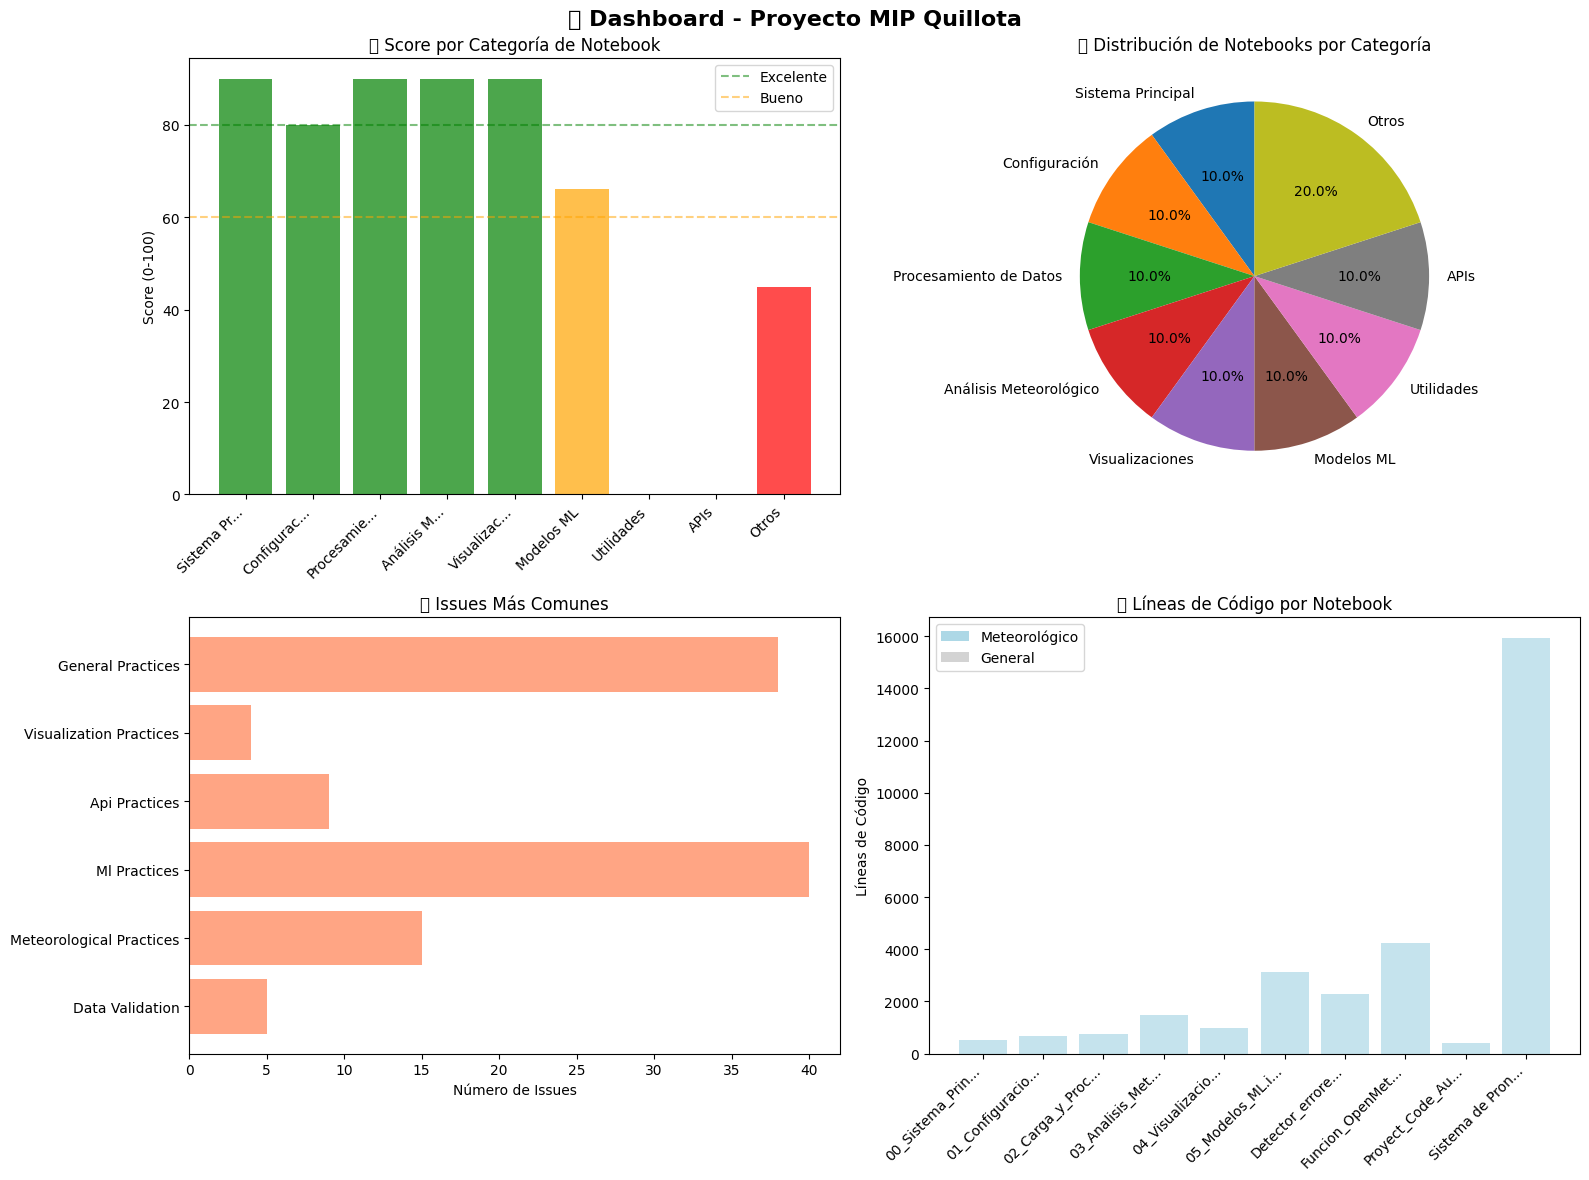

📋 Reporte completo guardado en: C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D\MIP_Quillota_Audit_20250811_125025.json
📄 Reporte ejecutivo guardado en: C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D\MIP_Executive_Report_20250811_125025.txt
📋 Plan de acción guardado en: C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D\Action_Plan_20250811_125025.md

🎉 ¡Auditoría completada!
📄 Revisa los archivos generados en tu directorio del proyecto.


In [1]:
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# SUGERENCIA: Considera dividir esta celda en múltiples celdas más pequeñas
# Código mejorado - 2025-08-11
import os
import json
import nbformat
from pathlib import Path
import subprocess
import tempfile
from datetime import datetime
import pandas as pd
from IPython.display import display, HTML, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Style, init
import warnings
warnings.filterwarnings('ignore')

# Inicializar colorama
init(autoreset=True)

class MIPQuillotaAuditor:
    def __init__(self, project_path):
        self.project_path = Path(project_path)
        self.notebooks = []
        self.audit_results = {}
        
        # Estructura específica del proyecto
        self.notebook_categories = {
            '00_Sistema_Principal': 'Sistema Principal',
            '01_Configuracion': 'Configuración',
            '02_Carga_y_Procesamiento': 'Procesamiento de Datos',
            '03_Analisis_Meteorologico': 'Análisis Meteorológico',
            '04_Visualizaciones': 'Visualizaciones',
            '05_Modelos_ML': 'Modelos ML',
            'Detector_errores': 'Utilidades',
            'Funcion_OpenMeteo': 'APIs',
            'Sistema de Pronostico': 'Pronósticos'
        }
        
    def scan_project_structure(self):
        """Escanea la estructura completa del proyecto"""
        print("🏗️  ESTRUCTURA DEL PROYECTO MIP QUILLOTA")
        print("="*60)
        
        # Escanear notebooks
        self.notebooks = [nb for nb in self.project_path.glob("*.ipynb") 
                         if '.ipynb_checkpoints' not in str(nb)]
        
        # Mostrar estructura
        folders = ['data', 'docs', 'modelos_ml_quillota', 'notebooks', 'src', 'tests']
        for folder in folders:
            folder_path = self.project_path / folder
            if folder_path.exists():
                files = list(folder_path.glob("*"))
                print(f"📁 {folder}/: {len(files)} archivos")
            else:
                print(f"📁 {folder}/: No existe")
        
        print(f"📊 Notebooks principales: {len(self.notebooks)}")
        for nb in self.notebooks:
            category = self.get_notebook_category(nb.name)
            print(f"  - {nb.name} ({category})")
        
        return self.notebooks
    
    def get_notebook_category(self, notebook_name):
        """Determina la categoría del notebook"""
        for key, category in self.notebook_categories.items():
            if key.lower() in notebook_name.lower():
                return category
        return 'Otros'
    
    def extract_code_from_notebook(self, notebook_path):
        """Extrae código con metadatos específicos"""
        try:
            with open(notebook_path, 'r', encoding='utf-8') as f:
                nb = nbformat.read(f, as_version=4)
        except Exception as e:
            print(f"❌ Error leyendo {notebook_path.name}: {e}")
            return []
        
        code_cells = []
        for i, cell in enumerate(nb.cells):
            if cell.cell_type == 'code' and cell.source.strip():
                code_cells.append({
                    'cell_index': i,
                    'content': cell.source,
                    'execution_count': cell.get('execution_count', 0),
                    'outputs': len(cell.get('outputs', [])),
                    'has_errors': any('error' in str(output).lower() for output in cell.get('outputs', []))
                })
        return code_cells
    
    def analyze_meteorological_code(self, code_content):
        """Análisis específico para código meteorológico"""
        lines = code_content.split('\n')
        code_lower = code_content.lower()
        
        analysis = {
            'is_meteorological': False,
            'data_sources': [],
            'meteorological_variables': [],
            'time_handling': [],
            'api_usage': [],
            'data_quality_checks': []
        }
        
        # Detectar si es código meteorológico
        meteo_keywords = ['temperatura', 'precipitacion', 'humedad', 'viento', 'presion', 
                         'weather', 'meteo', 'clima', 'lluvia', 'openmeteo']
        analysis['is_meteorological'] = any(keyword in code_lower for keyword in meteo_keywords)
        
        # Detectar fuentes de datos
        if 'openmeteo' in code_lower:
            analysis['data_sources'].append('OpenMeteo API')
        if 'csv' in code_lower or 'excel' in code_lower:
            analysis['data_sources'].append('Archivos locales')
        
        # Variables meteorológicas
        meteo_vars = ['temperature', 'precipitation', 'humidity', 'wind_speed', 
                     'pressure', 'solar_radiation']
        for var in meteo_vars:
            if var in code_lower:
                analysis['meteorological_variables'].append(var)
        
        # Manejo temporal
        time_keywords = ['datetime', 'date', 'time', 'timestamp', 'resample', 'groupby']
        for keyword in time_keywords:
            if keyword in code_lower:
                analysis['time_handling'].append(keyword)
        
        # Uso de APIs
        if 'requests' in code_lower or 'api' in code_lower:
            analysis['api_usage'].append('API calls detected')
        
        return analysis
    
    def check_mip_best_practices(self, code_content):
        """Verifica mejores prácticas específicas para proyectos MIP meteorológicos"""
        issues = {
            'data_validation': [],
            'meteorological_practices': [],
            'ml_practices': [],
            'api_practices': [],
            'visualization_practices': [],
            'general_practices': []
        }
        
        lines = code_content.split('\n')
        code_lower = code_content.lower()
        
        # Validación de datos
        if 'pd.read_csv' in code_content and 'parse_dates' not in code_content:
            issues['data_validation'].append("Considera usar parse_dates para fechas en read_csv()")
        
        if ('isna()' not in code_content and 'isnull()' not in code_content and 
            'dropna()' not in code_content and 'fillna()' not in code_content and
            'df[' in code_content):
            issues['data_validation'].append("Verifica valores nulos en los datos")
        
        # Prácticas meteorológicas
        if any(var in code_lower for var in ['temperatura', 'temperature', 'temp']):
            if 'unit' not in code_lower and 'celsius' not in code_lower and '°c' not in code_lower:
                issues['meteorological_practices'].append("Especifica unidades para temperatura")
        
        if 'precipitacion' in code_lower or 'precipitation' in code_lower:
            if 'mm' not in code_lower:
                issues['meteorological_practices'].append("Especifica unidades para precipitación (mm)")
        
        # Prácticas de ML
        if any(ml_lib in code_content for ml_lib in ['sklearn', 'train_test_split', 'model']):
            if 'random_state' not in code_content:
                issues['ml_practices'].append("Usa random_state para reproducibilidad")
            
            if 'cross_validation' not in code_content and 'cross_val_score' not in code_content:
                issues['ml_practices'].append("Considera usar validación cruzada")
        
        # Prácticas de API
        if 'requests' in code_content:
            if 'try:' not in code_content or 'except' not in code_content:
                issues['api_practices'].append("Agrega manejo de errores para llamadas API")
            
            if 'sleep(' not in code_content and 'rate' not in code_lower:
                issues['api_practices'].append("Considera rate limiting para APIs")
        
        # Visualizaciones
        if any(plot in code_content for plot in ['plt.plot', 'plt.scatter', 'sns.']):
            if 'plt.title' not in code_content:
                issues['visualization_practices'].append("Agrega títulos a tus gráficos")
            
            if 'plt.xlabel' not in code_content or 'plt.ylabel' not in code_content:
                issues['visualization_practices'].append("Agrega labels a los ejes")
        
        # Prácticas generales
        if len([line for line in lines if line.strip()]) > 50:
            issues['general_practices'].append("Celda muy larga, considera dividir")
        
        return issues
    
    def calculate_project_health_score(self, notebook_analysis):
        """Calcula score de salud específico para el proyecto"""
        base_score = 100
        
        # Penalizaciones por categoría
        penalties = {
            'data_validation': 15,
            'meteorological_practices': 10,
            'ml_practices': 12,
            'api_practices': 8,
            'visualization_practices': 5,
            'general_practices': 10
        }
        
        for cell in notebook_analysis.get('cells_analysis', []):
            best_practices = cell.get('best_practices', {})
            for category, issues in best_practices.items():
                if issues and category in penalties:
                    base_score -= min(len(issues) * penalties[category], penalties[category] * 2)
        
        return max(base_score, 0)
    
    def generate_mip_report(self):
        """Genera reporte específico para el proyecto MIP"""
        if not self.notebooks:
            self.scan_project_structure()
        
        print(f"\n🔍 ANÁLISIS DE CÓDIGO - PROYECTO MIP QUILLOTA")
        print("="*60)
        
        notebook_scores = {}
        category_analysis = {}
        
        for notebook_path in self.notebooks:
            print(f"\n📝 Analizando: {notebook_path.name}")
            
            category = self.get_notebook_category(notebook_path.name)
            code_cells = self.extract_code_from_notebook(notebook_path)
            
            notebook_analysis = {
                'path': str(notebook_path),
                'name': notebook_path.name,
                'category': category,
                'total_cells': len(code_cells),
                'cells_with_output': sum(1 for cell in code_cells if cell['outputs'] > 0),
                'cells_with_errors': sum(1 for cell in code_cells if cell['has_errors']),
                'cells_analysis': []
            }
            
            for cell in code_cells:
                if cell['content'].strip():
                    # Análisis meteorológico específico
                    meteo_analysis = self.analyze_meteorological_code(cell['content'])
                    
                    # Mejores prácticas MIP
                    best_practices = self.check_mip_best_practices(cell['content'])
                    
                    # Análisis básico
                    basic_analysis = self.analyze_code_basic(cell['content'])
                    
                    cell_analysis = {
                        'cell_index': cell['cell_index'],
                        'basic_analysis': basic_analysis,
                        'meteorological_analysis': meteo_analysis,
                        'best_practices': best_practices,
                        'suggestions': self.generate_mip_suggestions(
                            basic_analysis, meteo_analysis, best_practices, category
                        )
                    }
                    
                    notebook_analysis['cells_analysis'].append(cell_analysis)
            
            # Calcular score
            notebook_analysis['health_score'] = self.calculate_project_health_score(notebook_analysis)
            notebook_scores[notebook_path.name] = notebook_analysis['health_score']
            
            # Agrupar por categoría
            if category not in category_analysis:
                category_analysis[category] = []
            category_analysis[category].append(notebook_analysis)
            
            self.audit_results[notebook_path.name] = notebook_analysis
        
        # Mostrar resultados
        self._display_mip_results(notebook_scores, category_analysis)
        
        # Crear dashboard
        self._create_mip_dashboard(category_analysis)
        
        # Guardar reporte
        self._save_mip_report()
    
    def analyze_code_basic(self, code_content):
        """Análisis básico de código"""
        lines = code_content.split('\n')
        return {
            'total_lines': len(lines),
            'code_lines': len([l for l in lines if l.strip() and not l.strip().startswith('#')]),
            'comment_lines': len([l for l in lines if l.strip().startswith('#')]),
            'imports': len([l for l in lines if l.strip().startswith(('import ', 'from '))]),
            'functions': len([l for l in lines if 'def ' in l]),
            'long_lines': len([l for l in lines if len(l) > 88])
        }
    
    def generate_mip_suggestions(self, basic, meteo, practices, category):
        """Genera sugerencias específicas por categoría"""
        suggestions = []
        
        # Sugerencias por categoría de notebook
        if category == 'Configuración':
            if basic['imports'] > 20:
                suggestions.append("🔧 Considera organizar imports en módulos separados")
            suggestions.append("📋 Documenta las configuraciones principales")
        
        elif category == 'Procesamiento de Datos':
            if practices['data_validation']:
                suggestions.append("✅ Implementa validaciones robustas de datos")
            suggestions.append("💾 Guarda datos procesados en formato eficiente")
        
        elif category == 'Análisis Meteorológico':
            if not meteo['meteorological_variables']:
                suggestions.append("🌡️ Identifica claramente las variables meteorológicas")
            if practices['meteorological_practices']:
                suggestions.append("📊 Especifica unidades y rangos válidos")
        
        elif category == 'Modelos ML':
            if practices['ml_practices']:
                suggestions.append("🤖 Implementa validación cruzada y métricas")
            suggestions.append("💾 Guarda modelos entrenados")
        
        elif category == 'Visualizaciones':
            if practices['visualization_practices']:
                suggestions.append("📈 Mejora la calidad de gráficos")
            suggestions.append("🎨 Usa colores consistentes")
        
        # Sugerencias generales
        if basic['long_lines'] > 0:
            suggestions.append(f"📏 {basic['long_lines']} líneas muy largas")
        
        if basic['comment_lines'] / max(basic['code_lines'], 1) < 0.1:
            suggestions.append("💬 Agrega más comentarios explicativos")
        
        return suggestions
    
    def _display_mip_results(self, notebook_scores, category_analysis):
        """Muestra resultados específicos del proyecto"""
        # Score general del proyecto
        avg_score = sum(notebook_scores.values()) / len(notebook_scores) if notebook_scores else 0
        
        print(f"\n{'='*60}")
        print(f"📊 RESUMEN GENERAL DEL PROYECTO")
        print(f"{'='*60}")
        print(f"🎯 Score promedio del proyecto: {avg_score:.1f}/100")
        
        if avg_score >= 85:
            print(f"{Fore.GREEN}🏆 ¡Excelente! Proyecto en muy buen estado")
        elif avg_score >= 70:
            print(f"{Fore.YELLOW}🔧 Bien, pero con algunas mejoras pendientes")
        else:
            print(f"{Fore.RED}⚠️  Necesita atención urgente")
        
        # Análisis por categoría
        print(f"\n📋 ANÁLISIS POR CATEGORÍA:")
        for category, notebooks in category_analysis.items():
            avg_cat_score = sum(nb['health_score'] for nb in notebooks) / len(notebooks)
            total_issues = sum(
                len(issues) for nb in notebooks 
                for cell in nb.get('cells_analysis', [])
                for issues in cell.get('best_practices', {}).values()
            )
            
            color = Fore.GREEN if avg_cat_score >= 80 else Fore.YELLOW if avg_cat_score >= 60 else Fore.RED
            print(f"  {color}{category}: {avg_cat_score:.1f}/100 ({total_issues} issues)")
        
        # Top issues del proyecto
        print(f"\n🔍 PRINCIPALES ÁREAS DE MEJORA:")
        all_issues = {}
        for notebook_data in self.audit_results.values():
            for cell in notebook_data.get('cells_analysis', []):
                for category, issues in cell.get('best_practices', {}).items():
                    if category not in all_issues:
                        all_issues[category] = 0
                    all_issues[category] += len(issues)
        
        sorted_issues = sorted(all_issues.items(), key=lambda x: x[1], reverse=True)
        for category, count in sorted_issues[:5]:
            if count > 0:
                print(f"  • {category.replace('_', ' ').title()}: {count} issues")
    
    def _create_mip_dashboard(self, category_analysis):
        """Dashboard específico para el proyecto MIP"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🌡️ Dashboard - Proyecto MIP Quillota', fontsize=16, fontweight='bold')
        
        # 1. Score por categoría
        categories = list(category_analysis.keys())
        cat_scores = [
            sum(nb['health_score'] for nb in notebooks) / len(notebooks)
            for notebooks in category_analysis.values()
        ]
        
        colors = ['green' if s >= 80 else 'orange' if s >= 60 else 'red' for s in cat_scores]
        axes[0,0].bar(range(len(categories)), cat_scores, color=colors, alpha=0.7)
        axes[0,0].set_title('🎯 Score por Categoría de Notebook')
        axes[0,0].set_ylabel('Score (0-100)')
        axes[0,0].set_xticks(range(len(categories)))
        axes[0,0].set_xticklabels([cat[:10] + '...' if len(cat) > 10 else cat for cat in categories], 
                                  rotation=45, ha='right')
        axes[0,0].axhline(y=80, color='green', linestyle='--', alpha=0.5, label='Excelente')
        axes[0,0].axhline(y=60, color='orange', linestyle='--', alpha=0.5, label='Bueno')
        axes[0,0].legend()
        
        # 2. Distribución de notebooks por categoría
        nb_counts = [len(notebooks) for notebooks in category_analysis.values()]
        axes[0,1].pie(nb_counts, labels=categories, autopct='%1.1f%%', startangle=90)
        axes[0,1].set_title('📊 Distribución de Notebooks por Categoría')
        
        # 3. Issues más comunes
        all_issues = {}
        for notebook_data in self.audit_results.values():
            for cell in notebook_data.get('cells_analysis', []):
                for category, issues in cell.get('best_practices', {}).items():
                    if category not in all_issues:
                        all_issues[category] = 0
                    all_issues[category] += len(issues)
        
        if all_issues:
            issue_categories = list(all_issues.keys())[:6]  # Top 6
            issue_counts = [all_issues[cat] for cat in issue_categories]
            
            axes[1,0].barh(range(len(issue_categories)), issue_counts, color='coral', alpha=0.7)
            axes[1,0].set_title('🔍 Issues Más Comunes')
            axes[1,0].set_xlabel('Número de Issues')
            axes[1,0].set_yticks(range(len(issue_categories)))
            axes[1,0].set_yticklabels([cat.replace('_', ' ').title() for cat in issue_categories])
        
        # 4. Evolución de complejidad (líneas de código por notebook)
        notebook_names = []
        total_lines = []
        meteo_notebooks = []
        
        for notebook_name, data in self.audit_results.items():
            notebook_names.append(notebook_name[:15] + '...' if len(notebook_name) > 15 else notebook_name)
            lines = sum(cell.get('basic_analysis', {}).get('total_lines', 0) 
                       for cell in data.get('cells_analysis', []))
            total_lines.append(lines)
            
            # Verificar si es notebook meteorológico
            is_meteo = any(cell.get('meteorological_analysis', {}).get('is_meteorological', False)
                          for cell in data.get('cells_analysis', []))
            meteo_notebooks.append(is_meteo)
        
        colors_meteo = ['lightblue' if meteo else 'lightgray' for meteo in meteo_notebooks]
        axes[1,1].bar(range(len(notebook_names)), total_lines, color=colors_meteo, alpha=0.7)
        axes[1,1].set_title('📏 Líneas de Código por Notebook')
        axes[1,1].set_ylabel('Líneas de Código')
        axes[1,1].set_xticks(range(len(notebook_names)))
        axes[1,1].set_xticklabels(notebook_names, rotation=45, ha='right')
        
        # Leyenda para el último gráfico
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='lightblue', label='Meteorológico'),
                          Patch(facecolor='lightgray', label='General')]
        axes[1,1].legend(handles=legend_elements)
        
        plt.tight_layout()
        plt.show()
    
    def _save_mip_report(self):
        """Guarda reporte específico del proyecto MIP"""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Reporte JSON completo
        report_path = self.project_path / f"MIP_Quillota_Audit_{timestamp}.json"
        json_data = {}
        for k, v in self.audit_results.items():
            json_data[k] = v
            if 'path' in v:
                json_data[k]['path'] = str(v['path'])
        
        with open(report_path, 'w', encoding='utf-8') as f:
            json.dump(json_data, f, indent=2, ensure_ascii=False)
        
        # Reporte ejecutivo en texto
        executive_path = self.project_path / f"MIP_Executive_Report_{timestamp}.txt"
        with open(executive_path, 'w', encoding='utf-8') as f:
            f.write("REPORTE EJECUTIVO - PROYECTO MIP QUILLOTA\n")
            f.write("="*60 + "\n")
            f.write(f"Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            
            # Resumen general
            scores = [data['health_score'] for data in self.audit_results.values()]
            avg_score = sum(scores) / len(scores) if scores else 0
            
            f.write(f"RESUMEN GENERAL:\n")
            f.write(f"- Score promedio del proyecto: {avg_score:.1f}/100\n")
            f.write(f"- Total de notebooks analizados: {len(self.audit_results)}\n")
            f.write(f"- Estado general: ")
            
            if avg_score >= 85:
                f.write("EXCELENTE\n")
            elif avg_score >= 70:
                f.write("BUENO (con mejoras pendientes)\n")
            else:
                f.write("NECESITA ATENCIÓN\n")
            
            f.write(f"\nDETALLE POR NOTEBOOK:\n")
            f.write("-" * 40 + "\n")
            
            for notebook_name, data in self.audit_results.items():
                f.write(f"\n{notebook_name}:\n")
                f.write(f"  - Categoría: {data['category']}\n")
                f.write(f"  - Score: {data['health_score']:.1f}/100\n")
                f.write(f"  - Total celdas: {data['total_cells']}\n")
                f.write(f"  - Celdas con errores: {data['cells_with_errors']}\n")
                
                # Top 3 sugerencias
                all_suggestions = []
                for cell in data.get('cells_analysis', []):
                    all_suggestions.extend(cell.get('suggestions', []))
                
                unique_suggestions = list(set(all_suggestions))[:3]
                if unique_suggestions:
                    f.write(f"  - Principales sugerencias:\n")
                    for suggestion in unique_suggestions:
                        f.write(f"    • {suggestion}\n")
        
        print(f"📋 Reporte completo guardado en: {report_path}")
        print(f"📄 Reporte ejecutivo guardado en: {executive_path}")
        
        # Crear archivo de acciones recomendadas
        action_path = self.project_path / f"Action_Plan_{timestamp}.md"
        self._create_action_plan(action_path)
    
    def _create_action_plan(self, action_path):
        """Crea un plan de acción específico"""
        with open(action_path, 'w', encoding='utf-8') as f:
            f.write("# 🎯 Plan de Acción - Proyecto MIP Quillota\n\n")
            
            # Prioridades por score
            scores = [(name, data['health_score']) for name, data in self.audit_results.items()]
            scores.sort(key=lambda x: x[1])  # Menor score primero
            
            f.write("## 🚨 Prioridad Alta (Score < 60)\n\n")
            high_priority = [item for item in scores if item[1] < 60]
            if high_priority:
                for name, score in high_priority:
                    f.write(f"### {name} (Score: {score:.1f})\n")
                    data = self.audit_results[name]
                    
                    # Acciones específicas
                    all_issues = {}
                    for cell in data.get('cells_analysis', []):
                        for category, issues in cell.get('best_practices', {}).items():
                            if category not in all_issues:
                                all_issues[category] = []
                            all_issues[category].extend(issues)
                    
                    for category, issues in all_issues.items():
                        if issues:
                            f.write(f"- **{category.replace('_', ' ').title()}**: {len(issues)} issues\n")
                    f.write("\n")
            else:
                f.write("✅ No hay notebooks de prioridad alta.\n\n")
            
            f.write("## 🔶 Prioridad Media (Score 60-80)\n\n")
            medium_priority = [item for item in scores if 60 <= item[1] < 80]
            if medium_priority:
                for name, score in medium_priority:
                    f.write(f"- **{name}** (Score: {score:.1f}): Mejoras recomendadas\n")
            else:
                f.write("✅ No hay notebooks de prioridad media.\n\n")
            
            f.write("## ✅ Buen Estado (Score ≥ 80)\n\n")
            good_notebooks = [item for item in scores if item[1] >= 80]
            if good_notebooks:
                for name, score in good_notebooks:
                    f.write(f"- **{name}** (Score: {score:.1f}): Mantener calidad\n")
            
            f.write("\n## 🛠️ Acciones Generales Recomendadas\n\n")
            f.write("1. **Documentación**: Agregar docstrings a funciones principales\n")
            f.write("2. **Validación de Datos**: Implementar checks robustos\n")
            f.write("3. **Manejo de Errores**: Agregar try-catch para APIs\n")
            f.write("4. **Visualizaciones**: Mejorar labels y títulos\n")
            f.write("5. **Reproducibilidad**: Usar random_state en modelos ML\n")
            f.write("6. **Optimización**: Revisar líneas muy largas\n")
            
        print(f"📋 Plan de acción guardado en: {action_path}")

# Función auxiliar para mostrar progreso
def show_project_overview():
    """Muestra un overview rápido del proyecto"""
    project_path = Path(r"C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D")
    
    print("🌡️ PROYECTO MIP QUILLOTA - OVERVIEW")
    print("="*50)
    
    notebooks = list(project_path.glob("*.ipynb"))
    print(f"📊 Total notebooks encontrados: {len(notebooks)}")
    
    for nb in notebooks:
        size_kb = nb.stat().st_size / 1024
        print(f"  - {nb.name}: {size_kb:.1f} KB")
    
    folders = ['data', 'docs', 'modelos_ml_quillota', 'notebooks', 'src', 'tests']
    print(f"\n📁 Estructura de carpetas:")
    for folder in folders:
        folder_path = project_path / folder
        if folder_path.exists():
            files_count = len(list(folder_path.glob("*")))
            print(f"  ✅ {folder}/: {files_count} archivos")
        else:
            print(f"  ❌ {folder}/: No existe")

# EJECUCIÓN PRINCIPAL
if __name__ == "__main__":
    print("🚀 Iniciando auditoría del Proyecto MIP Quillota...")
    
    # Mostrar overview inicial
    show_project_overview()
    
    # Crear y ejecutar auditor
    auditor = MIPQuillotaAuditor(r"C:\Users\Alicia_Piero\Documents\Repo_AIEP\MIP_QUILLOTA\Proyecto_METGO_3D")
    auditor.generate_mip_report()
    
    print(f"\n🎉 ¡Auditoría completada!")
    print(f"📄 Revisa los archivos generados en tu directorio del proyecto.")